# 第13回 データの可視化

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tsuboshun/begin-python/blob/gh-pages/_sources/workbook/lecture13.ipynb)

___

## この授業で学ぶこと

今回から第15回にかけてデータサイエンスの入門講義を行う。
今回はデータの可視化をテーマに、matplotlibというライブラリの使い方を一通り解説する。またテーブルデータを扱うためのライブラリであるpandasについても解説する。

今回の授業で紹介するコードは何も見ないで書けるようになる必要はなく、これらを雛形にして使えるようになればよい。
matplotlibを使うと綺麗なグラフを作成できるようになるので、ぜひ他の授業のレポートなどでも活用してみてほしい。

また講義の終了後を見据えて、今回から課題を解くのに[ChatGPT](https://chat.openai.com/)を活用してもよいことにする。
これまでヒントをもらうことでなんとかコードを書いていた人も多いと思うが、そのような人でもChatGPTを先生代わりにすることで、一人でコードを書けるようになると期待する。もちろん自力でコードを書いた方が力になるので、まずは自力で課題に取り組むこと。またChatGPTを使う場合でも、出力を鵜呑みにするのではなく、その正しさを自分で判断し、出力を適宜修正しながら利用することが重要である。

## matplotlib入門

Pythonでグラフを描画するのに**matplotlib**というライブラリがよく用いられる。この節ではmatplotlibの使い方の基本を説明する。

matplotlibを使うには、その中のpyplotというモジュールをimportする。
またグラフのラベルに日本語を使えるようにするためにjapanize_matplotlibというモジュールをimportする。japanize_matplotlibはpipによるインストールが必要である[^f1]。

[^f1]: matplotlibも標準ライブラリではないため本来はpipによるインストールが必要であるが、Google Colabの環境では初めからインストールされている。

In [ ]:
pip install japanize_matplotlib

In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams.update({'font.size': 14})  # 文字サイズを14pxとする

まずは描画用のサンプルデータを用意しよう。matplotlibではリストまたは[第6回で紹介](label:numpy)したNumPyの配列（`ndarray`）を扱うことができる。ここでは配列のデータを用意する。

In [2]:
import numpy as np

# 0から10までの0.1刻みの配列
sample_x = np.arange(0, 10, 0.1)

# y = 2x + eps　（epsはノイズ）
eps = np.random.normal(loc=0, scale=1, size=len(sample_x))
sample_y = sample_x * 2 + eps

`np.arange()` 関数は、`np.arange(start, stop, step)` と呼び出すと `start` から `stop` までの `step` 刻みの配列を生成する。

In [3]:
sample_x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [4]:
len(sample_x)

100

`np.random.normal()` 関数は上のように呼び出すと、平均が0で標準偏差が1の正規分布に従う乱数の配列（長さ `len(sample_x)`）を生成する。代入先の `eps` はデータに加えるノイズとして使用する。

In [5]:
eps

array([-1.24361582,  0.77055443, -1.77389982,  1.78842983,  0.59702357,
        1.12472951, -0.00649613,  0.47246369,  0.37140968,  1.02840965,
       -0.12924494, -0.35966077,  0.80745209,  0.07744079, -0.07997511,
       -0.80314083,  1.24640422,  0.64528247,  0.99318952,  1.43098804,
        0.08547546, -0.10587505, -0.33921682,  0.75713745,  0.41841202,
       -0.51608197, -0.47863649,  0.05523357, -1.36956335, -1.0737363 ,
       -0.96371593,  0.30839593,  0.70675185,  0.98589148, -1.02669823,
       -0.69482968,  0.66576123, -0.30098694, -0.63520471,  0.8674969 ,
       -0.76532868,  0.14785377, -0.55683054, -0.22501306,  0.38726633,
       -0.84100015,  0.32614122, -1.9988606 , -0.37726841,  1.64376603,
       -0.28915979,  0.23500223, -1.24517606, -0.44874376, -0.48226263,
       -0.95022631,  0.8842136 ,  0.47969404, -0.23020598,  0.86010436,
        0.26464737,  0.28403982,  0.76150434, -0.21082207, -0.23606015,
       -0.84907788, -0.77231094,  0.18520571, -1.75292268,  1.44

配列の特徴の1つは、要素ごとの演算を一括で行えることである。`sample_x * 2 + eps` により、インデックスごとに `sample_x` の要素を2倍し、`eps` の要素を足している。

ここで生成した `sample_x` と `sample_y` は $\varepsilon$ をノイズとして $y = 2x + \varepsilon$ の関係を満たす2次元データ $(x, y)$ を100個生成したものと見ることができる。
1つ1つのデータは(`sample_x[0]`, `sample_y[0]`), (`sample_x[1]`, `sample_y[1]`), ..., (`sample_x[99]`, `sample_y[99]`)である。

### 散布図

サンプルデータを**散布図**として可視化してみよう。横軸に $x$、縦軸に $y$ の値をとって各データを点として打って描画する。このことをデータを散布図として**プロット**するという。

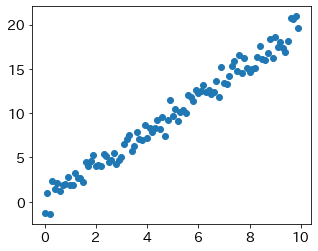

In [6]:
# プロットの入れ物の用意
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# 散布図のプロット
ax.scatter(sample_x, sample_y)

# 表示
plt.show()

1行目では `plt.subplots()` 関数によりFigureオブジェクトとAxesオブジェクトを生成して、変数 `fig` と `ax` に代入している[^f2][^f3]。

matplotlibによる描画はFigureオブジェクトとAxesオブジェクト、Axisオブジェクトの3つの要素で構成される。Axisオブジェクトは1つの軸を管理し、Axesオブジェクトは1つのグラフを管理し、Figureオブジェクトは描画全体を管理する。それぞれの関係を次の図に示す。

[^f2]: 一見すると戻り値が2つあるように見えるが、`plt.subplots()` はFigureオブジェクトとAxesオブジェクトのタプルを返しており（つまり戻り値は1つ）、タプルの各要素を `fig` と `ax` に割り当てている。戻り値のタプルを `,` 区切りの変数で受け取ることを**アンパック**という。
[^f3]: matplotlibの描画方法にはexplicit（明示的）な方法とimplicit（非明示的）な方法の2種類があるが、このテキストではexplicitな方法を説明する。implicitな方法というのは、`fig` や `ax` を用意することなく、いきなり `plt.plot()` などとプロットする方法のことである。implicitな方法は手軽にプロットできるというメリットがあるが、グラフの細かい調整ができないというデメリットもある。そのため、はじめからexplicitな方法を覚えるのがお勧めである。

```{figure} ./pic/fig_map.png
---
width: 400px
name: fig_map
---
グラフの構成要素
```

`plt.subplots()` 関数は `plt.subplots(n, m, figsize=(w, h))` と呼び出すと、横幅 `w`、高さ `h` （単位はインチ）のFigureオブジェクトと、その中に `n` 行 `m` 列の`n * m` 個のAxesオブジェクトを作成する。グラフを1枚だけ描画したい場合は、`n = m = 1` と指定する。もしくは引数で何も指定しなければ、デフォルト引数により `n = m = 1` が設定される。このときAxesオブジェクトが1つだけ作成され、戻り値の `ax` はAxesオブジェクトそのものになる。複数のグラフを同時に描画したい場合は、`n` または `m` または両方に2以上の整数を指定する。このときAxesオブジェクトが複数作成され、戻り値はAxesオブジェクトの配列となる。

散布図のプロットは `ax.scatter()` メソッドにより行う。第一引数に横軸の値の配列、第二引数に縦軸の値の配列を指定する。
最後に `plt.show()` 関数を呼び出すことで、グラフが表示される。

### グラフの調整

次にグラフの見た目を細かく調整してみよう。

まずは1枚のグラフに複数の散布図をプロットする。
先ほどのプロットに $y = 3x + \varepsilon$ の関係を満たすデータの散布図を追加する。

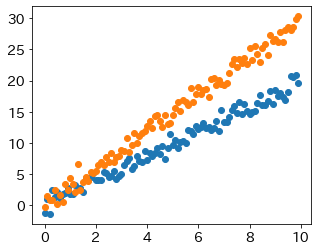

In [7]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
sample_y2 = sample_x * 3 + np.random.normal(loc=0, scale=1, size=len(sample_x))

# 散布図のプロット
ax.scatter(sample_x, sample_y)
ax.scatter(sample_x, sample_y2)

# 表示
plt.show()

このように同一のAxesオブジェクトの `scatter()` メソッドを複数回呼び出すことで、1つのグラフに複数の散布図をプロットすることができる。

プロットの色は自動的に設定されるが、自分で指定することもできる。
凡例や軸ラベル、タイトル、マーカーの種類の設定方法とともに紹介する。

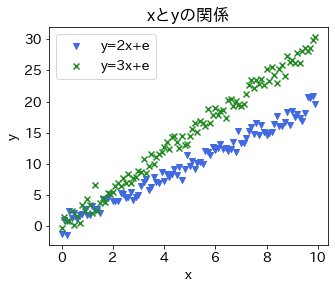

In [8]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# 散布図のプロット
ax.scatter(sample_x, sample_y, color='royalblue', marker='v', label='y=2x+e')
ax.scatter(sample_x, sample_y2, color='forestgreen', marker='x', label='y=3x+e')

# 軸ラベル・タイトルの設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('xとyの関係')

# 表示
plt.legend() # 凡例の表示
plt.show()

`ax.scatter()` メソッドのキーワード引数を使って、`color` を設定すると色を変更できる（`color` で指定できる色の名前の一覧は[こちら](https://matplotlib.org/stable/gallery/color/named_colors.html)）。`marker` を設定するとマーカーの種類を変更できる（`marker` で指定できる値の一覧は[こちら](https://matplotlib.org/stable/api/markers_api.html)）。`label` を設定すると凡例の表示を設定できる。凡例を表示するには、最後に `plt.legend()` を呼び出す。

軸ラベルは `ax.set_xlabel()`、`ax.set_ylabel()` により設定する。同様にタイトルは `ax.set_title()` により設定する。

### 折れ線グラフ

散布図と並んでよく使われるのが**折れ線グラフ**である。折れ線グラフでは、基本的にデータの順番は $x$ の値について昇順または降順であることを仮定する。
このとき横軸に $x$、縦軸に $y$ の値をとって各データを点として打つところは散布図と同じであるが、折れ線グラフではこれらの点を線で結ぶ。これにより $x$ の値が増えたときの、$y$ の値の連続的な変化を表現できる。

折れ線グラフのプロット例を以下に示す。
ノイズのない $y = 2x$ の関係を表す2次元データ $(x, y)$ を `sample_x`、`sample_y3` に用意し、その折れ線グラフを最初の散布図に重ねてプロットしている。

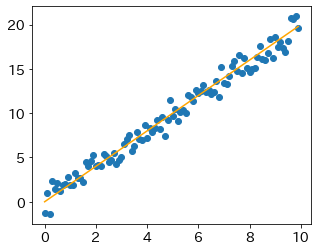

In [9]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

sample_y3 = sample_x * 2

# 散布図、折れ線グラフのプロット
ax.scatter(sample_x, sample_y)
ax.plot(sample_x, sample_y3, color="orange")

# 表示
plt.show()

**練習1**  
以下のコードにより、0から10までの0.1刻みの配列が `x` に、`x` のそれぞれの要素に対してsin関数の値を計算した配列が `y_sin` に、cos関数の値を計算した配列が `y_cos` に代入される。このとき `x` と `y_sin`、`x` と `y_cos` それぞれのペアについて折れ線グラフを作成することで、sin関数、cos関数を可視化しなさい。またそれぞれのプロットの区別がつくように `"sin関数"`、`"cos関数"` という凡例をつけなさい。

In [ ]:
x = np.arange(0, 10, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

In [ ]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# ここに適切なコードを書く


plt.legend() # 凡例の表示

# ファイルとして保存
plt.tight_layout()
plt.savefig("練習1.png") 

プロットしたら以下のコードを実行することにより、画像をダウンロードできる。これを提出しなさい。

In [ ]:
from google.colab import files
files.download("練習1.png")

```{toggle}
**解答例**   
<pre style={"white-space": "pre"}>
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# ここに適切なコードを書く
ax.plot(x, y_sin, label="sin関数")
ax.plot(x, y_cos, label="cos関数")

plt.legend() # 凡例の表示

# ファイルとして保存
plt.tight_layout()
plt.savefig("練習1.png") 
</pre>
```

## pandas入門

Pythonで表形式のデータ（テーブルデータ）を扱うのに**pandas**というライブラリがよく用いられる。この節ではpandasについて、今後の授業で使いうる機能に限定して説明する。

pandasを使うには、pandasモジュールをimportする。
ここでは説明のため、seabornというライブラリにサンプルとして用意されている `'diamonds'` というテーブルデータを使用する（データの説明は[こちら](https://ggplot2.tidyverse.org/reference/diamonds.html)）。`load_dataset()` 関数によりサンプルのテーブルデータを取得できる。このようなデータの集まりのことを**データセット**ともいう。

In [10]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('diamonds')

### データフレーム

pandasにおいてテーブルデータのことを**データフレーム**（**DataFrame**）という。
データフレームの持つ `head()` メソッドにより、先頭から5件のデータを表示することができる。
`head(10)` のように引数に整数を渡すことで、その件数だけデータを表示することもできる。

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


データフレームは、2次元配列の行方向と列方向にラベルがついたものと理解することができる。行方向のラベルのことを**index**、列方向のラベルのことを**columns**という。indexとcolumnsの値を指定して、要素にアクセスするには `loc` を使って次のように書く。

In [12]:
df.loc[0, "carat"]

0.23

データフレームは2次元配列と相互に変換することができる。データフレームから2次元配列を取得するには、`values` 属性にアクセスすればよい。

In [13]:
array = df.values
array

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', ..., 4.05, 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

2次元配列からデータフレームを作成するには次のように書く。

In [14]:
df2 = pd.DataFrame(array)
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


columnsのデフォルト値は0始まりの整数である。データフレームの作成時にcolumnsを設定するには、次のように書く。

In [15]:
df2 = pd.DataFrame(array, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'])
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### シリーズ

データフレームは2次元配列に行ラベル・列ラベルをつけたものであった。
pandasには、1次元配列に行ラベルをつけたデータ型も用意されており、**シリーズ**（**Series**）という。

データフレームに対してcolumnsの値を `[]` で指定すると、その列のデータをシリーズとして取得できる。

In [16]:
s = df["carat"]
s.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

indexの値を指定して、要素にアクセスするには `loc` を使って次のように書く。

In [17]:
s.loc[0]

0.23

シリーズは1次元配列と相互に変換することができる。シリーズから1次元配列を取得するには、`values` 属性にアクセスすればよい。

In [18]:
array = s.values
array

array([0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75])

1次元配列からシリーズを作成するには次のように書く。

In [19]:
s2 = pd.Series(array)
s2.head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
dtype: float64

### テーブル操作

データフレームを使うと、テーブルデータでよく行われる操作を簡単に実現することができる。データフレーム上でテーブルデータを加工し、加工したテーブルデータの値を配列として取得して、matplotlibなど他のライブラリに渡すというのがよくある使い方である。以下にいくつかの操作を紹介する。

#### ソート

`sort_values()` メソッドにより、引数に渡した列を基準にソートすることができる。デフォルトでは昇順にソートする。ソートした結果のデータフレームが戻り値として返されるので、以下のコードではそれを変数 `df` に再代入している。

In [20]:
df = df.sort_values("carat")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
31593,0.2,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,0.2,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,0.2,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,0.2,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28


降順にソートしたい場合は、引数に `ascending=False` を指定する。

In [21]:
df = df.sort_values("carat", ascending=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24


#### フィルタリング

テーブルデータの中から特定の条件を満たす行を抽出することを**フィルタリング**という。

フィルタリングを行うには、どのindexの行を抽出するかをブール型で表したシリーズを `loc` で指定する。
例えば、`cut` の種類が `Premium` の行を抽出したいとしよう。
このとき `cut` の種類が `Premium` かどうかを表すシリーズを次のように作成できる。

In [22]:
df['cut'] == 'Premium'

27415    False
27630    False
27130    False
25998     True
25999     True
         ...  
31601     True
31598    False
14        True
31599    False
31593     True
Name: cut, Length: 53940, dtype: bool

このシリーズを `loc`で指定することで、データフレームから `cut` の種類が `Premium` の行のみ抽出することができる。

In [23]:
df_premium = df.loc[df['cut'] == 'Premium']
df_premium.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85


#### 列の演算

シリーズは、配列と同様に各種演算を行うことができる。またデータフレームの列の追加や更新は代入文により行うことができる。
例えば、`x`、`y`、`z` の総和を求めて、その結果を `sum` という列として保持するには、以下のように書く。

In [24]:
df['sum'] = df['x'] + df['y'] + df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,sum
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,28.26
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,27.11
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,26.28
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,26.41
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,26.20


例えば、`price` の対数を計算して `price_log` という列として保持するには、以下のように書く。
このようにデータが数値の列に対して、NumPyの関数を適用することも可能である。

In [25]:
df['price_log'] = np.log(df['price'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,sum,price_log
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,28.26,9.799127
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,27.11,9.827200
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,26.28,9.760137
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,26.41,9.630563
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,26.20,9.630563


**練習2**  
`diamonds` データセットにおいて全データの価格の平均は `np.mean(df["price"].values)` 、カラットの平均は `np.mean(df["carat"].values)` により求めることができる。フィルタリングを行うことにより、カット `"cut"` の種類が `"Ideal"` のデータにおける価格の平均、カラットの平均を求めなさい。`"Ideal"` はカットの種類の中では一番良いカテゴリだが、価格の平均が全データでの平均より小さくなるのはなぜだろうか。

```{toggle}
**解答例**   
<pre style={"white-space": "pre"}>
df_ideal = df.loc[df["cut"] == "Ideal"]
print(np.mean(df_ideal["price"].values))
print(np.mean(df_ideal["carat"].values))
</pre>
```

**練習3**  
`diamonds` データセットにおいて価格上位5件、下位5件のデータを表示しなさい。

```{toggle}
**解答例**   
<pre style={"white-space": "pre"}>
df.sort_values("price", ascending=False).head()  # 上位5件

df.sort_values("price").head()  # 下位5件（上とは別のセルで実行する）
</pre>
```

## 演習

**課題**  
`diamonds` データセットにおいて `"carat"` と `"price"` の関係を散布図として可視化しなさい。`"carat"` の値を横軸、`"price"` の値を縦軸にとり、横軸には `"カラット"`、縦軸には `"価格"` という軸ラベルをつけなさい。

In [ ]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
x = df["carat"].values
y = df["price"].values

# ここに適切なコードを書く


# ファイルとして保存
plt.tight_layout()
plt.savefig("課題1.png") 

プロットしたら以下のコードを実行することにより、画像をダウンロードできる。これを提出しなさい。

In [ ]:
from google.colab import files
files.download("課題1.png")

追記： 課題に取り組む上での注意点  
- 最初から一通りのセルを実行していないと、上のコードを実行する準備が整わないことがあるので気を付ける。よくわからないエラーが出る場合は、ノートブック最初の2つのセル、pandas入門という節の最初のセルを改めて実行してから取り組むこと。
- ファイルとして保存する場合は、`plt.show()` は実行しない。これを実行してしまうと白紙の画像ファイルがダウンロードされる。

```{toggle}
**解答例**   
<pre style={"white-space": "pre"}>
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
x = df["carat"].values
y = df["price"].values

# ここに適切なコードを書く
ax.scatter(x, y)

ax.set_xlabel("カラット")
ax.set_ylabel("価格")

# ファイルとして保存
plt.tight_layout()
plt.savefig("課題1.png") 
</pre>
```